In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz

In [32]:
# Our main plotting package (must have explicit import of submodules)
import bokeh.io
import bokeh.plotting
import bokeh.layouts

import bokeh.layouts
import bokeh.models

import iqplot


# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
# az.style.use("arviz-grayscale")
# from cycler import cycler
# default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
# plt.rc('axes', prop_cycle=default_cycler)
plt.rc('figure', dpi=300)
np.random.seed(123)

az.style.use("arviz-darkgrid")

In [3]:
cs_data = pd.read_csv('data/chemical_shifts_theo_exp.csv')
diff = cs_data.theo - cs_data.exp
cat_encode = pd.Categorical(cs_data['aa'])
idx = cat_encode.codes
coords = {"aa": cat_encode.categories}

In [15]:
coords_mod = {"aa": cat_encode.categories,"aa_flat":cat_encode.categories[idx]}

In [16]:
coords_mod

{'aa': Index(['ALA', 'ARG', 'ASN', 'ASP', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU',
        'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'],
       dtype='object'),
 'aa_flat': Index(['ILE', 'TYR', 'SER', 'ALA', 'ARG', 'TYR', 'SER', 'GLY', 'VAL', 'ASP',
        ...
        'LEU', 'PHE', 'GLU', 'MET', 'VAL', 'LYS', 'ARG', 'LYS', 'GLU', 'SER'],
       dtype='object', length=1776)}

In [18]:
with pm.Model(coords=coords) as cs_nh:         
    μ = pm.Normal('μ', mu=0, sigma=10, dims="aa") 
    σ = pm.HalfNormal('σ', sigma=10, dims="aa") 
 
    y = pm.Normal('y', mu=μ[idx], sigma=σ[idx], observed=diff) 
     
    idata_cs_nh = pm.sample(random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


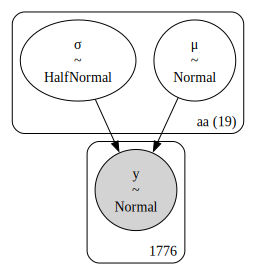

In [28]:
cs_nh.to_graphviz()

In [24]:
# with pm.Model(coords=coords_mod) as cs_nh_2:         
#     μ = pm.Normal('μ', mu=0, sigma=10, dims="aa") 
#     σ = pm.HalfNormal('σ', sigma=10, dims="aa") 
 
#     y = pm.Normal('y', mu=μ[idx], sigma=σ[idx], observed=diff, dims="aa_flat") 
     
#     idata_cs_nh_2 = pm.sample(random_seed=4591)

In [27]:
idata_cs_nh.posterior['μ'].sel(chain=0, aa='ARG')

<xarray.DataArray 'μ' (draw: 1000)>
array([-4.98933033e-01, -4.10366783e-01, -4.07969965e-01, -2.83698058e-01,
       -3.71301055e-01, -3.99600771e-01,  2.13812157e-02, -6.17457267e-01,
       -5.87174496e-03, -6.32023061e-01, -5.05411236e-02, -1.31362590e-01,
       -6.14978654e-01, -2.68169059e-01, -3.65933832e-01, -2.36508966e-01,
       -4.63503848e-01, -3.16552638e-01, -3.26578940e-01, -4.07029680e-01,
       -1.10821099e-01, -4.73295564e-01, -1.84172637e-01, -3.32534614e-01,
       -3.14367763e-01, -7.91920277e-02, -2.20328844e-01, -6.56319349e-01,
        2.06018955e-02, -1.77124437e-01, -6.76996478e-01, -4.54784243e-02,
       -6.33914815e-01, -2.56052026e-02, -7.05498823e-01, -6.09829272e-01,
        8.20828620e-02, -4.90480561e-01, -1.42015224e-01, -4.71950116e-01,
       -1.89672292e-01, -2.67280665e-01, -2.74321190e-01, -4.17327880e-01,
       -1.93717436e-01, -4.22940135e-01, -5.09706947e-01, -3.98725792e-01,
       -3.01111740e-01, -5.21914568e-02, -7.36079538e-01,  1.16569348e-01,
        2.35237726e-02, -4.62676247e-01, -1.63931211e-01, -6.25811169e-01,
       -1.80416168e-01, -2.12538124e-01, -2.34225958e-01, -3.96559210e-01,
       -1.28407640e-01, -4.91376827e-01, -1.19018611e-01, -4.58307067e-01,
       -3.40125140e-01, -3.03229568e-01, -3.19093930e-01, -1.50971468e-01,
       -2.14307353e-01, -3.91804190e-01, -2.96478858e-01, -3.78904047e-01,
       -3.78904047e-01, -4.54942071e-01, -5.56881737e-01, -3.64270650e-01,
       -3.33899062e-01, -2.62847263e-01, -3.71007165e-01, -2.61448816e-01,
...
       -2.82979467e-01, -3.27028605e-01, -2.75518069e-01, -2.42105452e-01,
       -3.05419878e-01, -2.56331690e-01, -5.44978009e-02, -5.85720338e-01,
       -1.60477767e-01, -4.56675435e-01, -1.97841688e-01, -4.98025168e-01,
       -1.64849596e-01, -4.67223162e-01, -1.40931929e-01, -4.51767089e-01,
       -2.71330035e-01, -3.57888134e-01, -4.00698622e-01, -2.78755957e-01,
       -3.79643715e-01, -2.49043911e-01,  4.40920881e-02, -7.96232809e-01,
       -6.57401445e-01, -2.27595822e-01, -1.51305518e-01, -5.53301854e-01,
       -8.56441461e-02, -5.76236424e-01, -4.60872114e-02, -3.43366186e-01,
       -4.36705451e-01, -1.26633089e-01, -5.90520663e-01,  1.09035557e-01,
       -2.96987388e-01, -5.16845447e-01, -1.09690617e-01, -4.34420981e-01,
       -4.44614157e-02, -6.20319196e-01,  5.62367002e-02, -2.17792497e-01,
       -4.25402845e-01, -2.56956237e-01, -3.12375090e-01, -1.83656949e-01,
       -4.36744405e-01, -4.55340490e-01, -8.17984336e-02, -5.68439966e-01,
       -2.49858826e-01, -3.63309145e-01, -4.91293191e-01, -6.68724225e-02,
       -3.98853075e-01, -1.16503526e-01, -5.08006546e-01, -3.52697303e-01,
       -3.73234555e-01, -4.81889916e-01, -1.88841406e-01, -2.35431313e-01,
       -3.21672944e-01, -3.44509263e-01, -4.15578356e-01, -2.59719992e-01,
       -1.41911721e-01, -5.43433580e-01, -2.47143217e-01, -8.68766927e-02,
       -4.94536043e-01, -2.22080727e-01, -3.51346241e-01, -2.56999741e-01,
       -2.83583910e-01, -4.95502381e-01, -7.86470860e-03, -5.54247541e-01])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
    aa       <U3 'ARG'

In [29]:
with pm.Model(coords=coords) as cs_h:
    # hyper_priors
    μ_mu = pm.Normal('μ_mu', mu=0, sigma=10)
    μ_sd = pm.HalfNormal('μ_sd', 10)

    # priors
    μ = pm.Normal('μ', mu=μ_mu, sigma=μ_sd, dims="aa") 
    σ = pm.HalfNormal('σ', sigma=10, dims="aa") 

    y = pm.Normal('y', mu=μ[idx], sigma=σ[idx], observed=diff) 

    idata_cs_h = pm.sample(random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_mu, μ_sd, μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


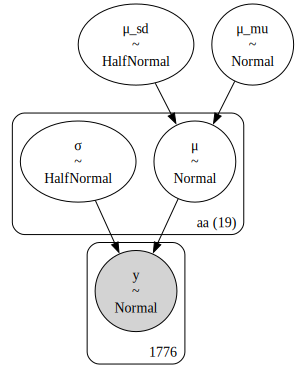

In [30]:
cs_h.to_graphviz()

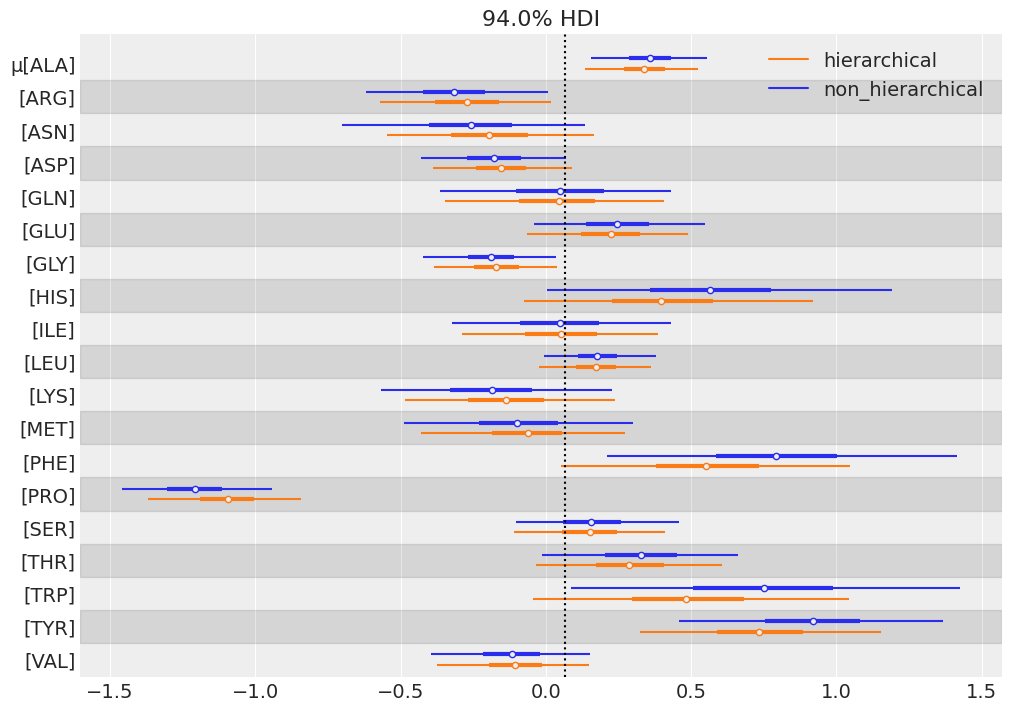

In [42]:
axes = az.plot_forest([idata_cs_nh, idata_cs_h], model_names=['non_hierarchical', 'hierarchical'],
                      var_names='μ', combined=True, r_hat=False, ess=False, figsize=(10, 7),
                      colors='cycle')
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_cs_h.posterior['μ_mu'].mean(), *y_lims, color="k", ls=":");
plt.savefig("../fig/csh_vs_csnh.png")

In [43]:
# for name, model in zip(("cs_nh", "cs_h"), (cs_nh, cs_h)):
#     graph = pm.model_to_graphviz(model)
#     graph.graph_attr.update(size="2,2!")
#     graph.graph_attr.update(dpi="300")
#     graph.render(filename=name, format="png", cleanup=True)

In [90]:
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

In [75]:
len(group_idx)

90

In [76]:
len(data),len(N_samples),group_idx

(90,
 3,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [91]:
with pm.Model() as model_h:
    # hypyerpriors
    μ = pm.Beta('μ', 1., 1.)
    ν = pm.HalfNormal('ν', 10)
    # prior
    θ = pm.Beta('θ', mu=μ, nu=ν, shape=len(N_samples))
    # likelihood
    y = pm.Bernoulli('y', p=θ[group_idx], observed=data)

    idata_h = pm.sample(random_seed=4591)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, ν, θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


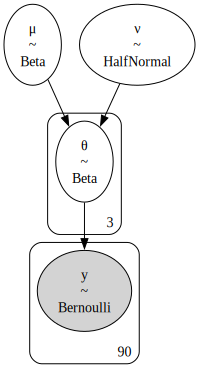

In [92]:
model_h.to_graphviz()

In [81]:
# summary_1 = az.summary(idata_h, kind="stats")
# summary_2 = az.summary(idata_h, kind="stats")
summary_3 = az.summary(idata_h, kind="stats")
# az.summary(idata_h)

In [82]:
summary_1

,mean,sd,hdi_3%,hdi_97%
μ,0.586,0.099,0.400,0.766
ν,12.092,6.030,2.112,23.359
θ[0],0.596,0.082,0.431,0.739
θ[1],0.598,0.078,0.450,0.741
θ[2],0.597,0.080,0.447,0.747


In [83]:
summary_2

,mean,sd,hdi_3%,hdi_97%
μ,0.162,0.078,0.044,0.311
ν,11.505,6.193,1.296,22.664
θ[0],0.113,0.051,0.025,0.207
θ[1],0.112,0.051,0.027,0.209
θ[2],0.112,0.051,0.023,0.202


In [84]:
summary_3

,mean,sd,hdi_3%,hdi_97%
μ,0.305,0.120,0.093,0.522
ν,5.733,3.876,0.344,12.618
θ[0],0.554,0.090,0.395,0.729
θ[1],0.128,0.058,0.028,0.235
θ[2],0.128,0.057,0.025,0.234


/var/folders/85/tlfm3vqd341d4p524v094j6r0000gn/T/ipykernel_90389/1522849626.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


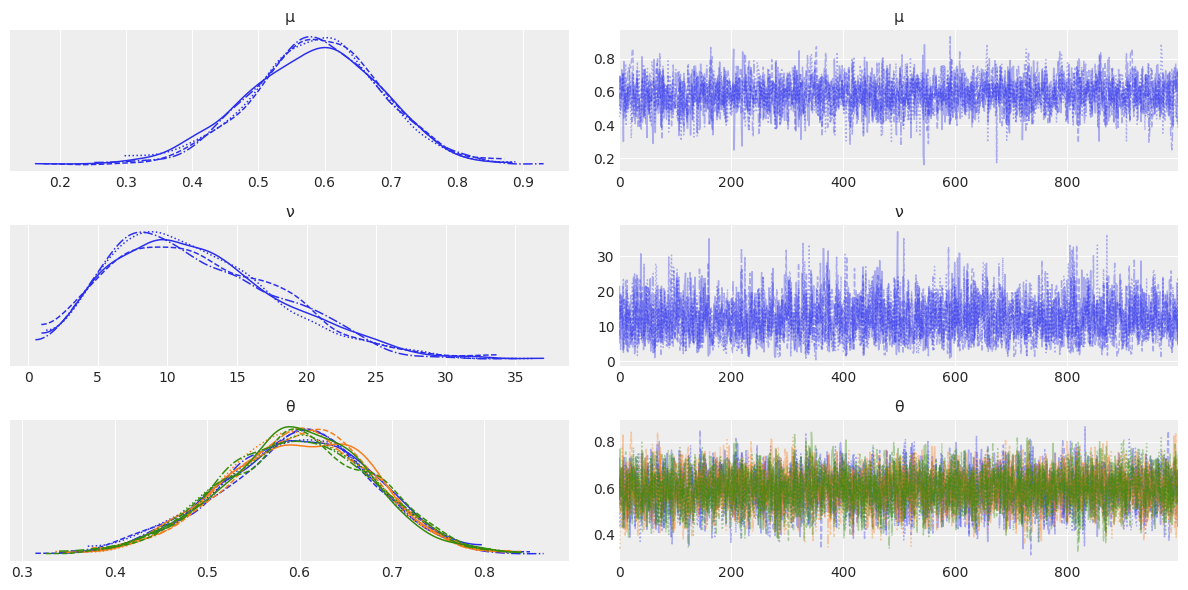

In [93]:
az.plot_trace(idata_h)
plt.tight_layout();
plt.savefig("../fig/idata_h_trace.png")

In [86]:
idata_h

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

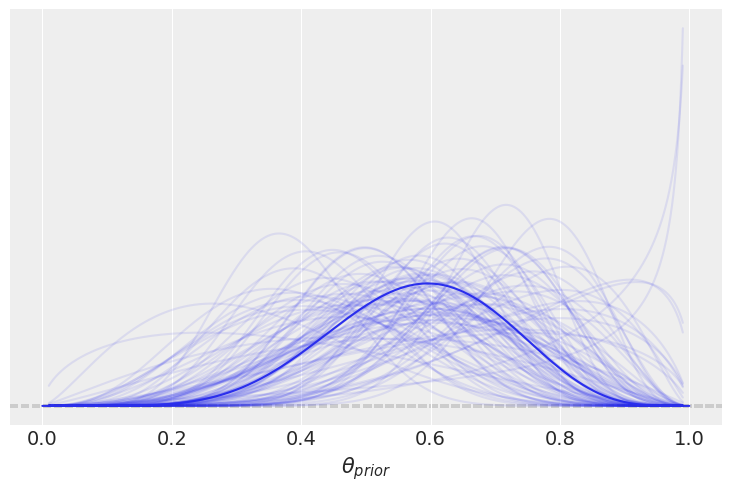

In [94]:

posterior = az.extract(idata_h, num_samples=100)
for sample in posterior[["μ", "ν"]].to_array().values.T:
    pz.Beta(mu=sample[0], kappa=sample[1]).plot_pdf(legend=None, color="C0", alpha=0.1, support=(0.01, 0.99), moments="m")

pz.Beta(mu=posterior["μ"].mean().item(), kappa=posterior["ν"].mean().item()).plot_pdf(legend=None, color="C0", moments="m")
plt.xlabel('$θ_{prior}$')
plt.savefig("../fig/idata_h_posterior.png")

In [124]:
football = pd.read_csv("data/football_players.csv", dtype={'position':'category'})
football

,name,position,goals,shots
0,Aaron Connolly,FW,5,59
1,Aaron Cresswell,DF,4,69
2,Aaron Hunt,MF,3,30
3,Aaron Lennon,MF,1,5
4,Aaron Leya Iseka,FW,10,76
...,...,...,...,...
2677,Óscar Mingueza,DF,2,12
2678,Óscar Plano,MF,12,124
2679,Óscar Rodríguez,MF,13,133
2680,Óscar Trejo,MF,1,20


In [96]:
pos_idx = football.position.cat.codes.values
pos_codes = football.position.cat.categories
n_pos = pos_codes.size
n_players = football.index.size

In [109]:
pos_idx,pos_codes

(array([1, 0, 3, ..., 3, 3, 0], dtype=int8),
 Index(['DF', 'FW', 'GK', 'MF'], dtype='object'))

In [107]:
n_pos,n_players,pos_codes

(4, 2682, Index(['DF', 'FW', 'GK', 'MF'], dtype='object'))

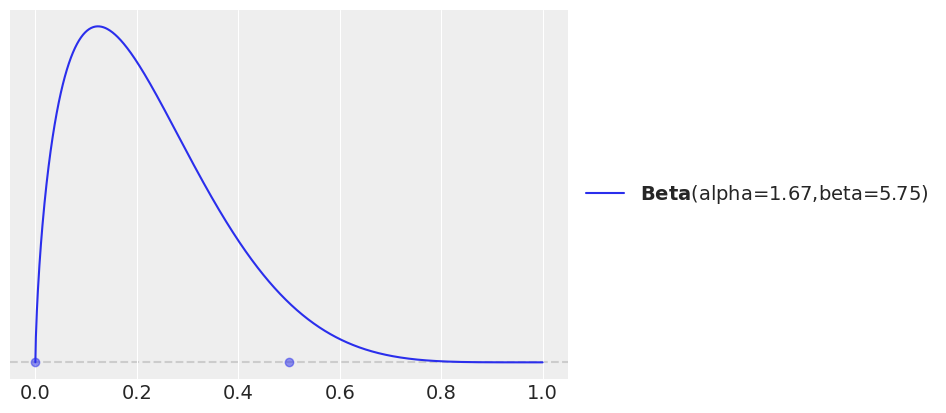

In [111]:
dist = pz.Beta()
pz.maxent(dist, 0.0, 0.5, 0.95);

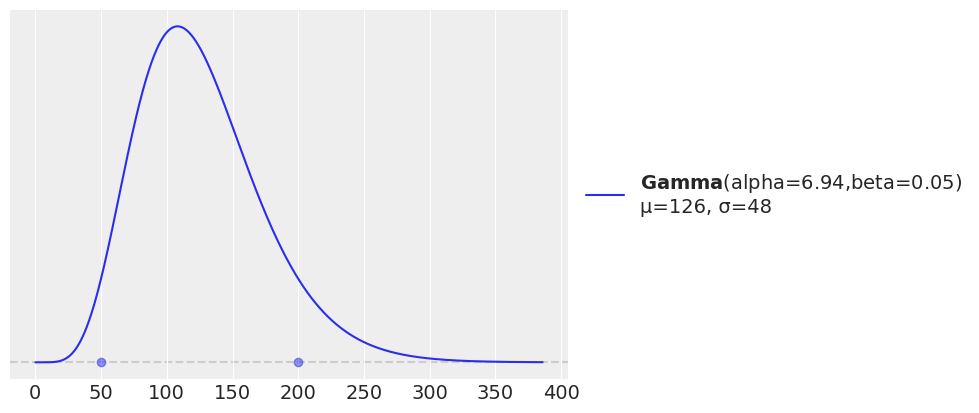

In [117]:
dist = pz.Gamma()
pz.maxent(dist, 50, 200, 0.9,plot_kwargs={"moments":["m", "d"]});

In [118]:
coords = {"pos": pos_codes}
with pm.Model(coords=coords) as model_football:
    # Hyper parameters
    μ = pm.Beta('μ', 1.7, 5.8) 
    ν = pm.Gamma('ν', mu=125, sigma=50)

    
    # Parameters for positions
    μ_p = pm.Beta('μ_p',
                       mu=μ,
                       nu=ν,
                       dims = "pos")
    
    ν_p = pm.Gamma('ν_p', mu=125, sigma=50, dims="pos")
 
    # Parameter for players
    θ = pm.Beta('θ', 
                    mu=μ_p[pos_idx],
                    nu=ν_p[pos_idx])
    
    _ = pm.Binomial('gs', n=football.shots.values, p=θ, observed=football.goals.values)

    idata_football = pm.sample(draws=3000, target_accept=0.95, random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, ν, μ_p, ν_p, θ]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 373 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [160]:
idata_football['posterior']

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 3000, pos: 4, θ_dim_0: 2682)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 2993 2994 2995 2996 2997 2998 2999
  * pos      (pos) <U2 'DF' 'FW' 'GK' 'MF'
  * θ_dim_0  (θ_dim_0) int64 0 1 2 3 4 5 6 ... 2676 2677 2678 2679 2680 2681
Data variables:
    μ        (chain, draw) float64 0.1151 0.1171 0.08096 ... 0.103 0.06891
    ν        (chain, draw) float64 124.6 116.3 178.9 67.93 ... 125.3 69.17 115.9
    μ_p      (chain, draw, pos) float64 0.08235 0.1283 ... 0.06511 0.08426
    ν_p      (chain, draw, pos) float64 90.47 57.08 162.7 ... 68.68 60.63 85.67
    θ        (chain, draw, θ_dim_0) float64 0.1436 0.05477 ... 0.06545 0.06444
Attributes:
    created_at:                 2024-07-10T07:42:38.877022
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.8.0
    sampling_time:              372.77706122398376
    tuning_steps:               1000

In [15]:
# graph = pm.model_to_graphviz(model_football)
# graph.graph_attr.update(size="4,4!")
# graph.graph_attr.update(dpi="300")
# graph.render(filename="beta_binomial_hierarchical_subjects_dag", format="png", cleanup=True)

In [154]:
mean_ronaldo = (football.loc[football['name'] == 'Cristiano Ronaldo','goals']/football.loc[football['name'] == 'Cristiano Ronaldo','shots']).mean()
mean_messi = (football.loc[football['name'] == 'Lionel Messi','goals']/football.loc[football['name'] == 'Lionel Messi','shots']).mean()
mean_FW = (football.loc[football['position'] == 'FW','goals']/football.loc[football['position'] == 'FW','shots']).mean()
mean_all_players = (football['goals']/football['shots']).mean()

mean_ronaldo,mean_messi,mean_FW,mean_all_players

(0.14697802197802198,
 0.1736111111111111,
 0.12271374329823444,
 0.08759352351406746)

/var/folders/85/tlfm3vqd341d4p524v094j6r0000gn/T/ipykernel_90389/142143390.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


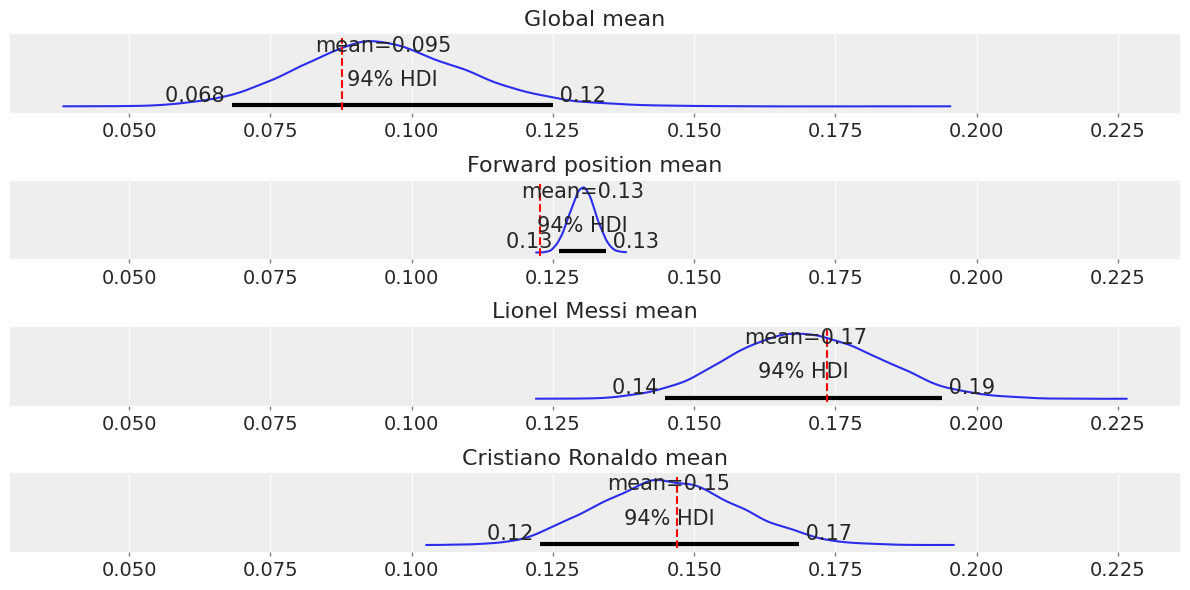

In [151]:
_, ax = plt.subplots(4, 1, figsize=(12, 6), sharex=True)

az.plot_posterior(idata_football, var_names='μ', ax=ax[0])
y_lims = ax[0].get_ylim()
ax[0].vlines(mean_all_players, *y_lims, color="red", ls="--")
ax[0].set_title(r"Global mean")

az.plot_posterior(idata_football.posterior.sel(pos="FW"), var_names='μ_p', ax=ax[1])
y_lims = ax[1].get_ylim()
ax[1].vlines(mean_FW, *y_lims, color="red", ls="--")
ax[1].set_title(r"Forward position mean")

az.plot_posterior(idata_football.posterior.sel(θ_dim_0=1457), var_names='θ', ax=ax[2])
y_lims = ax[2].get_ylim()
ax[2].vlines(mean_messi, *y_lims, color="red", ls="--")
ax[2].set_title(r"Lionel Messi mean")

az.plot_posterior(idata_football.posterior.sel(θ_dim_0=468), var_names='θ', ax=ax[3])
y_lims = ax[3].get_ylim()
ax[3].vlines(mean_ronaldo, *y_lims, color="red", ls="--")
ax[3].set_title(r"Cristiano Ronaldo mean")

plt.tight_layout()
plt.savefig("../fig/beta_binomial_hierarchical_subjects_global_mus.png")

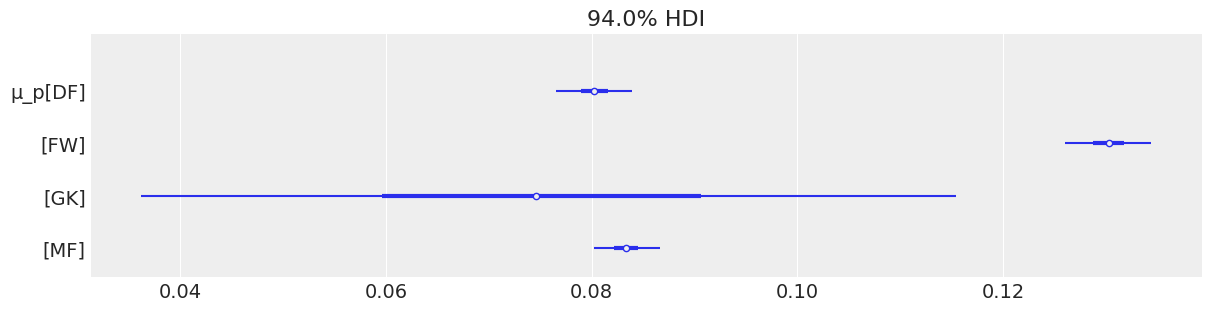

In [130]:
az.plot_forest(idata_football, var_names=['μ_p'], combined=True, figsize=(12, 3))
plt.savefig("../fig/beta_binomial_hierarchical_subjects_positions.png")

In [166]:
N_samples = [30, 30, 30]
G_samples = [3, 3, 18]
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

In [167]:
with pm.Model() as model_h:
    # hypyerpriors
    μ = pm.Beta('μ', 1., 1.)
    ν = pm.HalfNormal('ν', 10)
    # prior
    θ = pm.Beta('θ', mu=μ, nu=ν, shape=len(N_samples))
    # likelihood
    y = pm.Bernoulli('y', p=θ[group_idx], observed=data)

    idata_h = pm.sample(random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, ν, θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


In [168]:
with pm.Model() as model_nh:
    # prior
    θ = pm.Beta('θ', alpha=1, beta=1, shape=len(N_samples))
    # likelihood
    y = pm.Bernoulli('y', p=θ[group_idx], observed=data)

    idata_nh = pm.sample(random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [171]:
idata_nh

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [163]:
# az.plot_posterior(idata_h, var_names='μ')

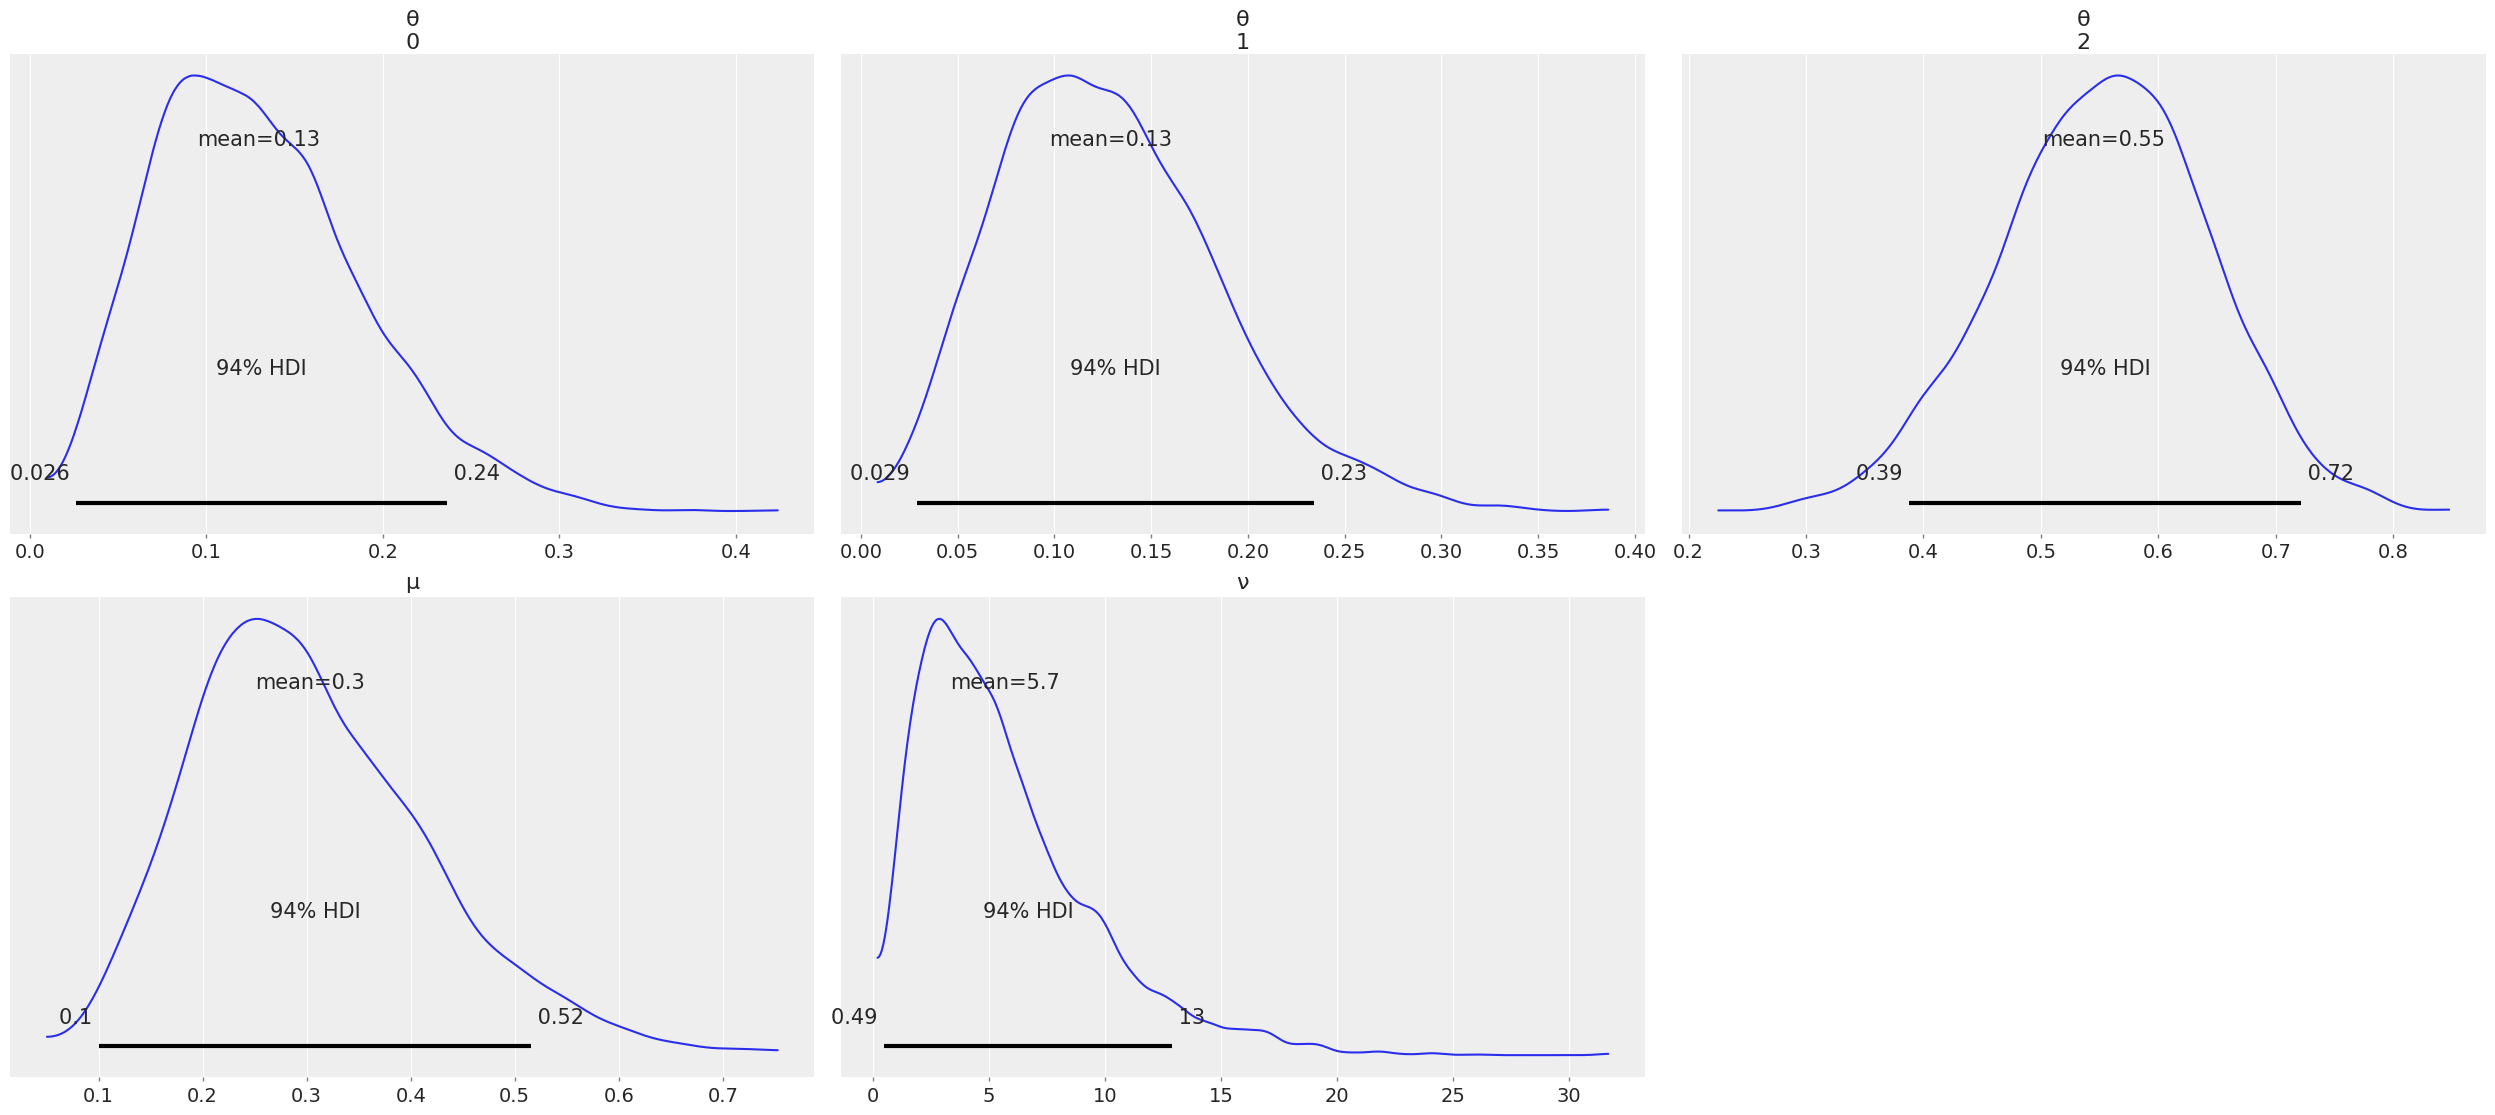

In [179]:
az.plot_posterior(idata_h, var_names=['θ', 'μ', 'ν']);

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

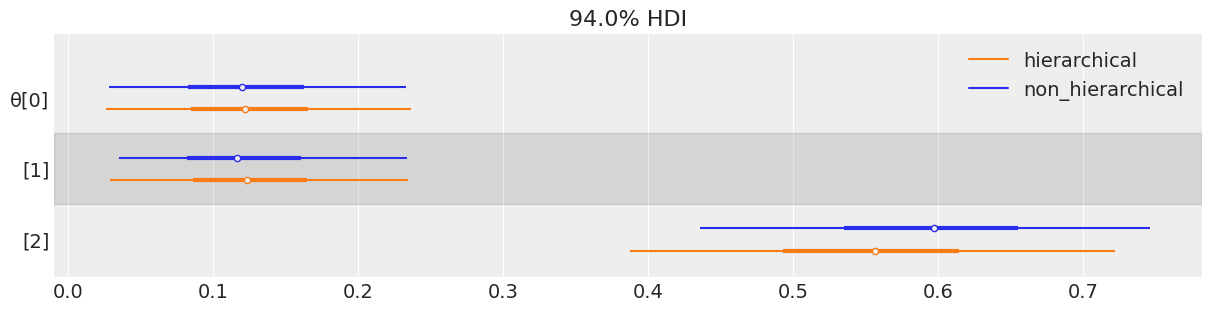

In [173]:
az.plot_forest([idata_nh, idata_h], model_names=['non_hierarchical', 'hierarchical'],
                      var_names='θ', combined=True, r_hat=False, ess=False, figsize=(12, 3),
                      colors='cycle')

Text(0.5, 1.0, 'Posterior non-hierarchichal')

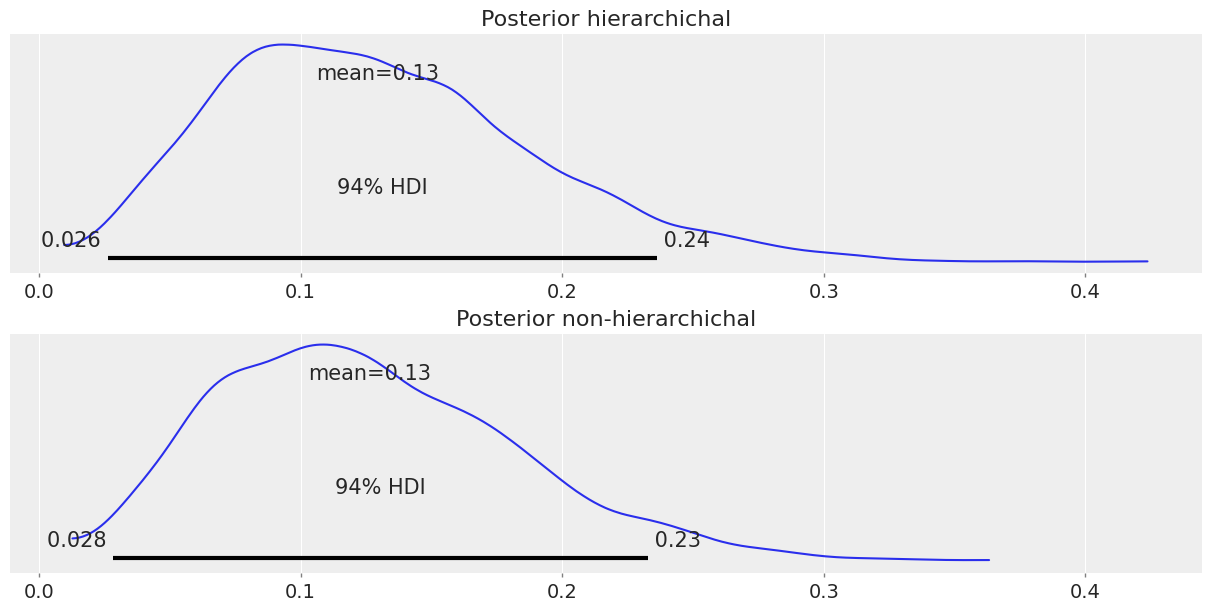

In [170]:
_, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

az.plot_posterior(idata_h, var_names='θ', ax=ax[0])
ax[0].set_title(r"Posterior hierarchichal")

az.plot_posterior(idata_nh, var_names='θ', ax=ax[1])
ax[1].set_title(r"Posterior non-hierarchichal")

In [180]:
tips = pd.read_csv("data/tips.csv")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [181]:
categories = np.array(["Thur", "Fri", "Sat", "Sun"])

tip = tips["tip"].values
idx = pd.Categorical(tips["day"], categories=categories).codes

idx

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0], dtype=int8)

In [183]:
coords = {"days": categories, "days_flat":categories[idx]}

with pm.Model(coords=coords) as comparing_groups_nh:
    μ = pm.HalfNormal("μ", sigma=5, dims="days")
    σ = pm.HalfNormal("σ", sigma=1, dims="days")

    y = pm.Gamma("y", mu=μ[idx], sigma=σ[idx], observed=tip)

    idata_cg = pm.sample(random_seed=4591)
    # idata_cg.extend(pm.sample_posterior_predictive(idata_cg, random_seed=4591))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


In [186]:
coords = {"days": categories, "days_flat":categories[idx]}

with pm.Model(coords=coords) as comparing_groups_h:
    # hypyerpriors
    σ_μ = pm.HalfNormal("σ_μ", sigma=5)
    σ_σ = pm.HalfNormal("σ_σ", sigma=1)
    
    μ = pm.HalfNormal("μ", sigma=σ_μ, dims="days")
    σ = pm.HalfNormal("σ", sigma=σ_σ, dims="days")

    y = pm.Gamma("y", mu=μ[idx], sigma=σ[idx], observed=tip)

    idata_cg_h = pm.sample(random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ_μ, σ_σ, μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


In [193]:
coords = {"days": categories, "days_flat":categories[idx]}

with pm.Model(coords=coords) as comparing_groups_h_00:
    μ_g = pm.Gamma("μ_g", mu=5, sigma=2)
    μ = pm.HalfNormal("μ", sigma=μ_g, dims="days")
    σ = pm.HalfNormal("σ", sigma=1, dims="days")

    y = pm.Gamma("y", mu=μ[idx], sigma=σ[idx], observed=tip, dims="days_flat")

    idata_cg_h_00 = pm.sample(random_seed=4591)


with pm.Model(coords=coords) as comparing_groups_h_01:
    μ_g = pm.Gamma("μ_g", mu=5, sigma=2)
    σ_g = pm.Gamma("σ_g", mu=2, sigma=1.5)
    μ = pm.Gamma("μ", mu=μ_g, sigma=σ_g, dims="days")
    σ = pm.HalfNormal("σ", sigma=1, dims="days")

    y = pm.Gamma("y", mu=μ[idx], sigma=σ[idx], observed=tip, dims="days_flat")

    idata_cg_h_01 = pm.sample(random_seed=4591)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_g, μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_g, σ_g, μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
There were 108 divergences after tuning. Increase `target_accept` or reparameterize.


/var/folders/85/tlfm3vqd341d4p524v094j6r0000gn/T/ipykernel_90389/3654642155.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


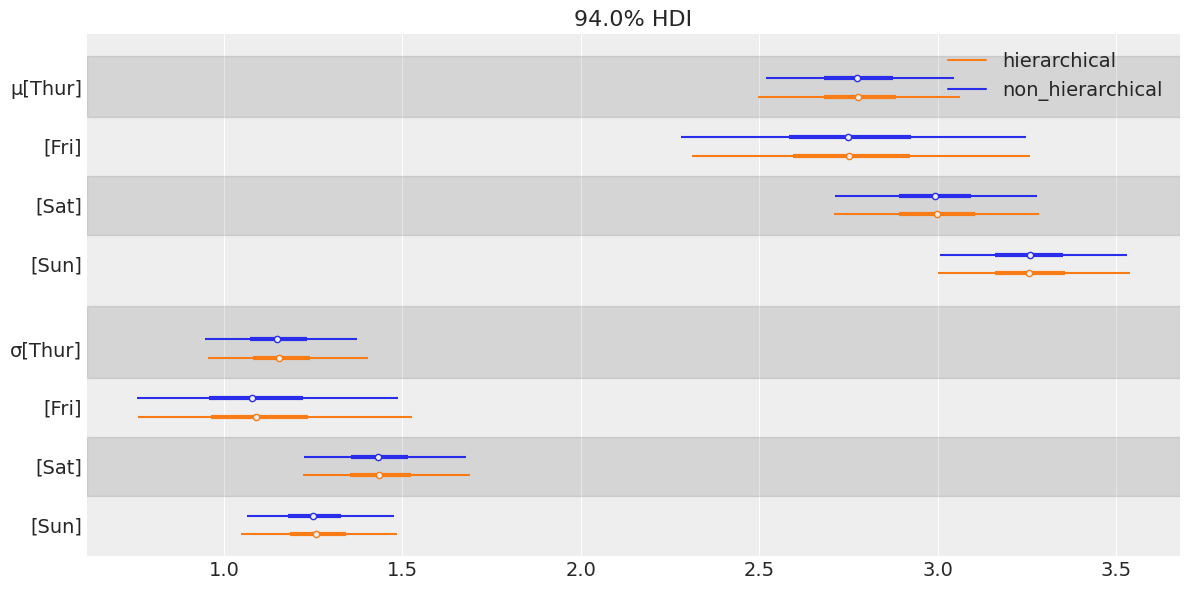

In [192]:
az.plot_forest([idata_cg, idata_cg_h], model_names=['non_hierarchical', 'hierarchical'],
                      var_names=['μ','σ'], combined=True, r_hat=False, ess=False, figsize=(12, 6),
                      colors='cycle')

plt.tight_layout();

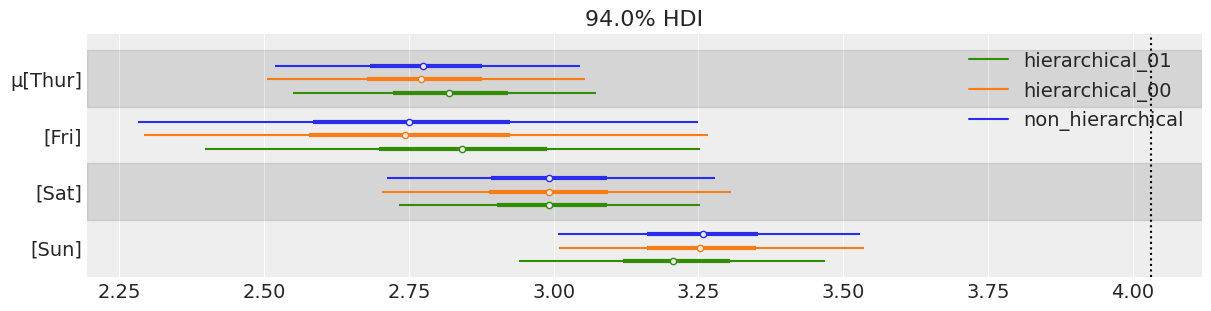

In [194]:
axes = az.plot_forest([idata_cg, idata_cg_h_00, idata_cg_h_01],
                      model_names=['non_hierarchical', 'hierarchical_00', 'hierarchical_01'],
                      var_names=['μ'], combined=True, r_hat=False, ess=False, figsize=(12, 3),
                      colors='cycle')
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_cg_h_00.posterior['μ_g'].mean(), *y_lims, color="k", ls=":");

In [209]:
cs_data = pd.read_csv('data/chemical_shifts_theo_exp.csv')
diff = cs_data.theo - cs_data.exp
cat_encode = pd.Categorical(cs_data['aa'])
idx = cat_encode.codes
idx_cat = pd.Categorical(cs_data['cat']).codes
coords = {"aa": cat_encode.categories}

In [249]:
nested_idx = np.array(list(zip(idx,idx_cat)))

nested_idx

array([[ 8,  1],
       [17,  2],
       [14,  2],
       ...,
       [10,  0],
       [ 5,  0],
       [14,  2]], dtype=int8)

In [207]:
coords_mod = {"aa": cat_encode.categories,"cat":pd.Categorical(cs_data['cat']).categories}
coords_mod

{'aa': Index(['ALA', 'ARG', 'ASN', 'ASP', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU',
        'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'],
       dtype='object'),
 'cat': Index(['Charged', 'Non-Polar', 'Polar', 'Special'], dtype='object')}

In [206]:
pd.Categorical(cs_data['cat']).categories

Index(['Charged', 'Non-Polar', 'Polar', 'Special'], dtype='object')

In [211]:
# with pm.Model(coords=coords) as cs_nh:         
#     μ = pm.Normal('μ', mu=0, sigma=10, dims="aa") 
#     σ = pm.HalfNormal('σ', sigma=10, dims="aa") 
 
#     y = pm.Normal('y', mu=μ[idx], sigma=σ[idx], observed=diff) 
     
#     idata_cs_nh = pm.sample(random_seed=4591)

In [268]:
# Convert nested_idx to tuple for advanced indexing
nested_idx_T = tuple(nested_idx.T)

nested_idx_T

(array([ 8, 17, 14, ..., 10,  5, 14], dtype=int8),
 array([1, 2, 2, ..., 0, 0, 2], dtype=int8))

In [ ]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
with pm.Model(coords=coords) as cs_h:
    # hyper_priors
    μ_mu = pm.Normal('μ_mu', mu=0, sigma=10)
    μ_sd = pm.HalfNormal('μ_sd', 10)

    # priors
    μ = pm.Normal('μ', mu=μ_mu, sigma=μ_sd, dims="aa") 
    σ = pm.HalfNormal('σ', sigma=10, dims="aa") 

    y = pm.Normal('y', mu=μ[idx], sigma=σ[idx], observed=diff) 

    idata_cs_h = pm.sample(random_seed=4591)

In [283]:
with pm.Model(coords=coords_mod) as cs_h_2:
    # hyper_priors
    μ_hmu = pm.Normal('μ_hmu', mu=0, sigma=10)
    μ_hsd = pm.HalfNormal('μ_hsd', 10)

    # hyper_priors
    μ_mean = pm.Normal('μ_mean', mu=μ_hmu, sigma=μ_hsd, dims='cat')
    μ_std = pm.HalfNormal('μ_std', 10, dims='cat')

    # priors
    μ = pm.Normal('μ', mu=μ_mean, sigma=μ_std, dims=("aa","cat")) 
    σ = pm.HalfNormal('σ', sigma=10, dims="aa") 

  # Advanced indexing to select μ using nested_idx
    μ_selected = μ[nested_idx[:, 0], nested_idx[:, 1]]

    # Likelihood
    y = pm.Normal('y', mu=μ_selected, sigma=σ[idx], observed=diff)

    idata_cs_h_2 = pm.sample(random_seed=4591,target_accept=0.995)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_hmu, μ_hsd, μ_mean, μ_std, μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1113 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 38 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


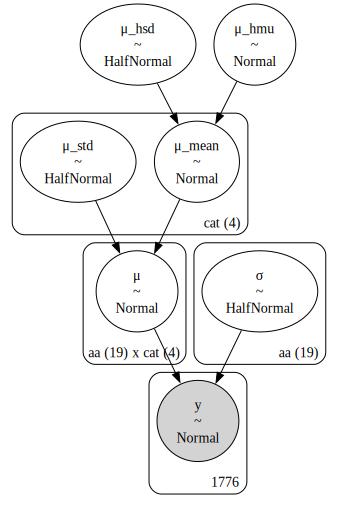

In [282]:
cs_h_2.to_graphviz()

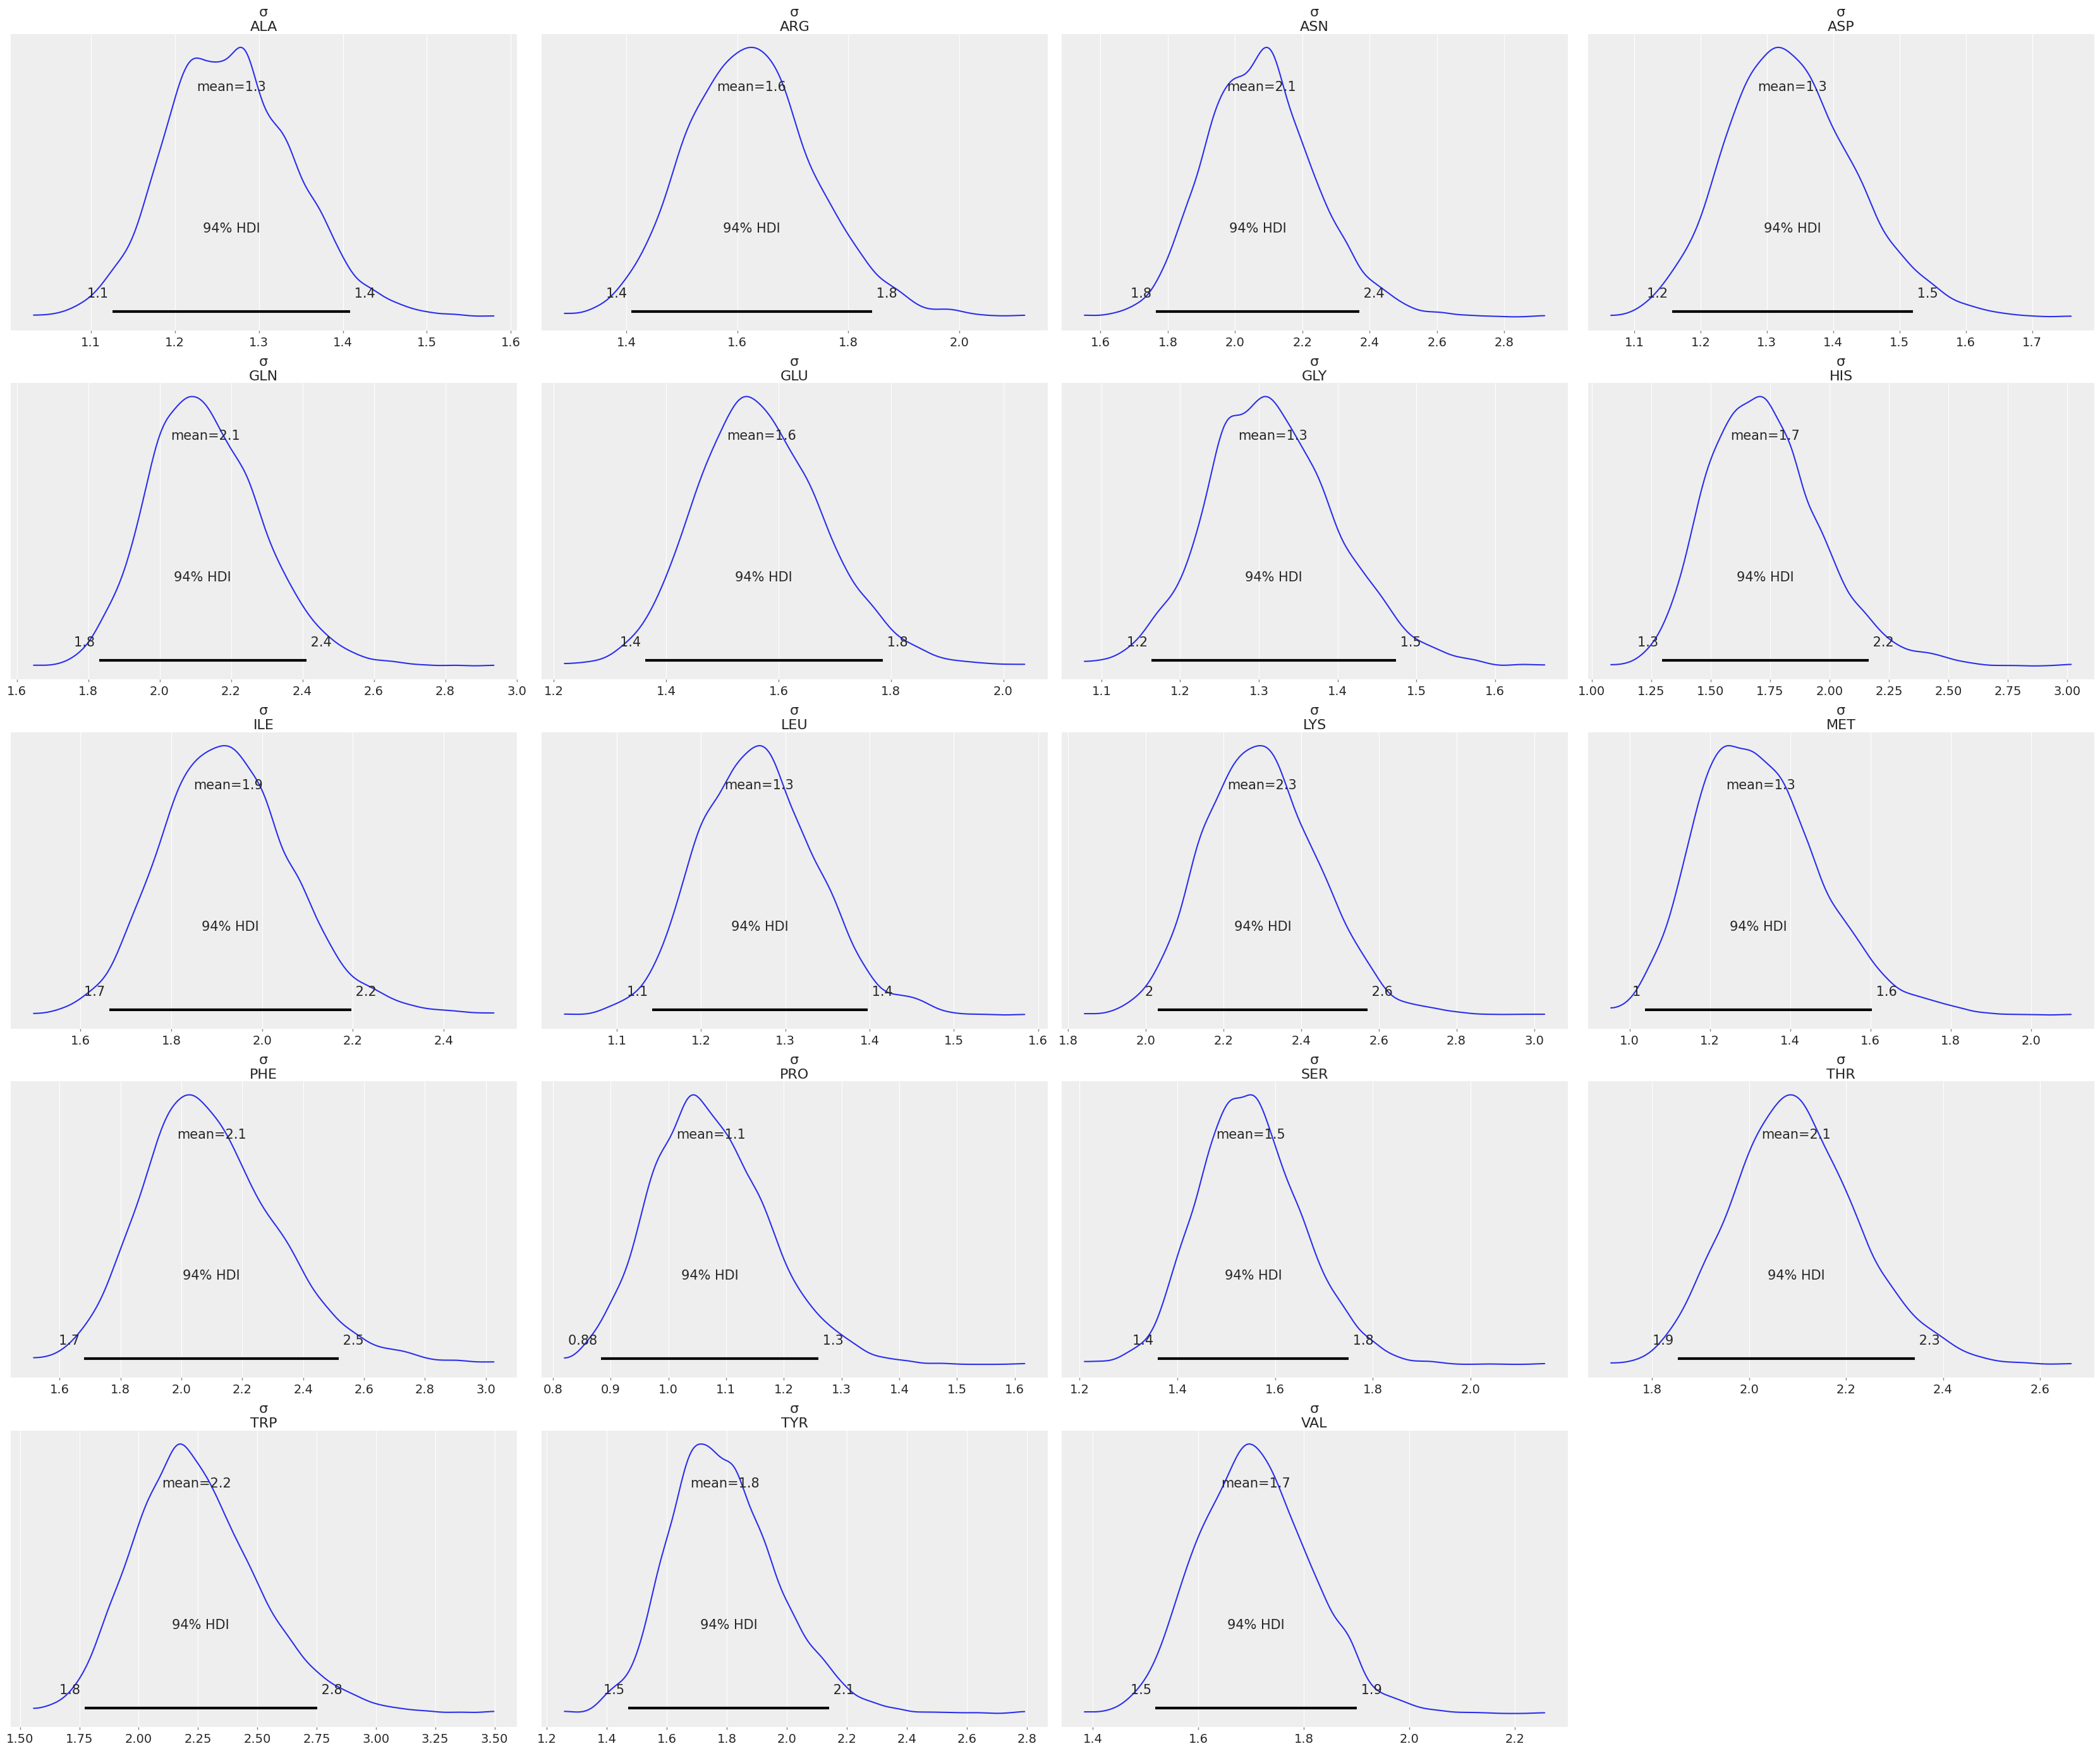

In [287]:
az.plot_posterior(idata_cs_h_2,var_names=['σ']);

/var/folders/85/tlfm3vqd341d4p524v094j6r0000gn/T/ipykernel_90389/2711015419.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


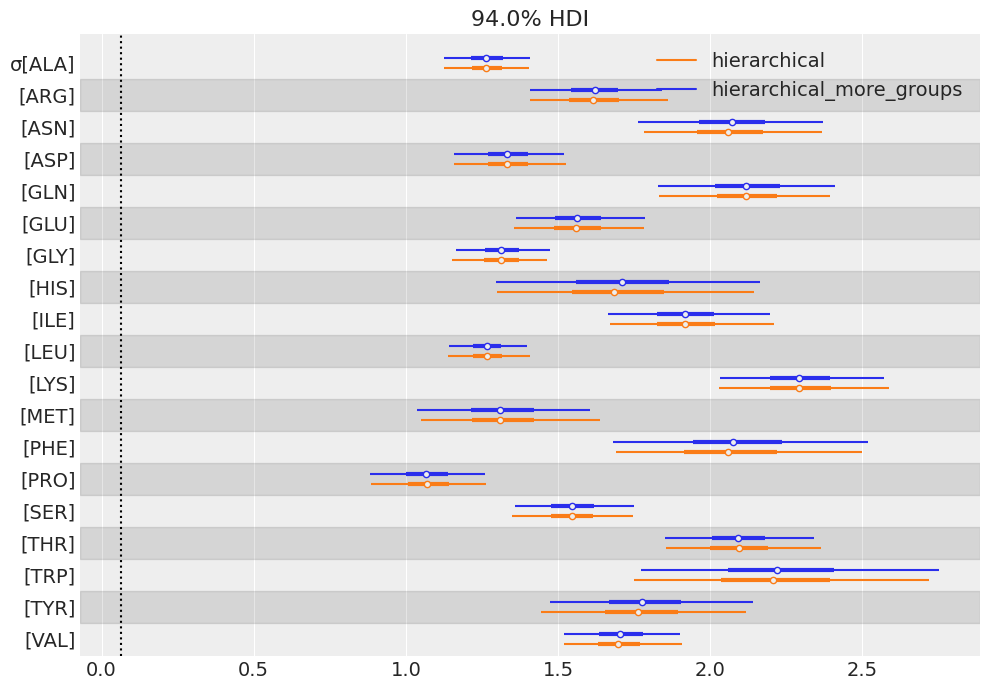

In [289]:
axes = az.plot_forest([idata_cs_h_2, idata_cs_h], model_names=['hierarchical_more_groups', 'hierarchical'],
                      var_names=['σ'], combined=True, r_hat=False, ess=False, figsize=(10, 7),
                      colors='cycle')

y_lims = axes[0].get_ylim()
axes[0].vlines(idata_cs_h.posterior['μ_mu'].mean(), *y_lims, color="k", ls=":");
plt.tight_layout();